# LOAD DATA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('DATASET_STROKE.csv')

In [ ]:
data

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# EDA

## INFORMATION DATASET

In [ ]:
data.shape

(5110, 12)

In [ ]:
data.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [ ]:
# Memilih hanya kolom numerik
numerical_data = data.select_dtypes(include=['number'])

# Menghitung korelasi
correlation_matrix = numerical_data.corr()

# Menampilkan hasil korelasi
print(correlation_matrix)


                         id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.003084  0.006388  
age                         0.238171  0.333398  0.245257  
hypertension                0.174474  0.167811  0.127904  
heart_disease               0.161857  0.041357  0.134914  
avg_glucose_level           1.000000  0.175502  0.131945  
bmi                         0.175502  1.000000  0.042374  
stroke                    

In [ ]:
correlation_matrix

id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.003084  0.006388  
age                         0.238171  0.333398  0.245257  
hypertension                0.174474  0.167811  0.127904  
heart_disease               0.161857  0.041357  0.134914  
avg_glucose_level           1.000000  0.175502  0.131945  
bmi                         0.175502  1.000000  0.042374  
stroke                      0.131945  0.042374  1.000000

## PENGECEKAN DATA KOSONG

In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### REPLACE DATA BMI YANG KOSONG DENGAN NILAI RATA-RATA

In [ ]:
data.bmi.replace(to_replace=np.nan, value=data.bmi.mean(), inplace=True)

In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## PENGECEKAN VALUE UNIK YANG ADA PADA DATASET

In [ ]:
data.nunique().sort_values(ascending=False)

id                   5110
avg_glucose_level    3979
bmi                   419
age                   104
work_type               5
smoking_status          4
gender                  3
hypertension            2
Residence_type          2
ever_married            2
heart_disease           2
stroke                  2
dtype: int64

## VISUALISASI (UNIVARIATE ANALYSIS)

### KORELASI PADA DATASET

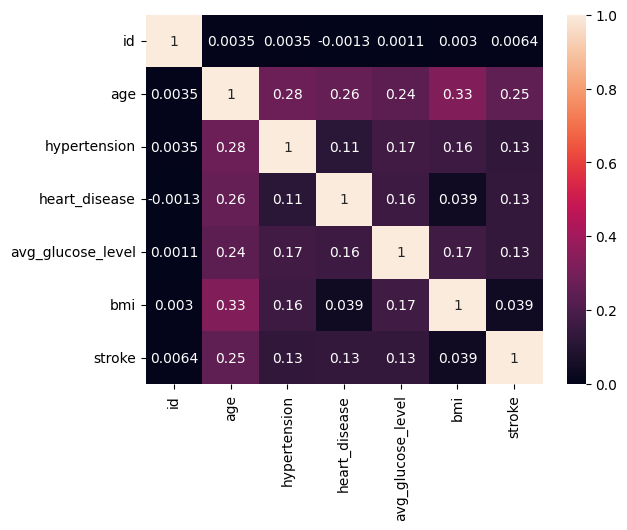

In [ ]:
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

<Axes: >

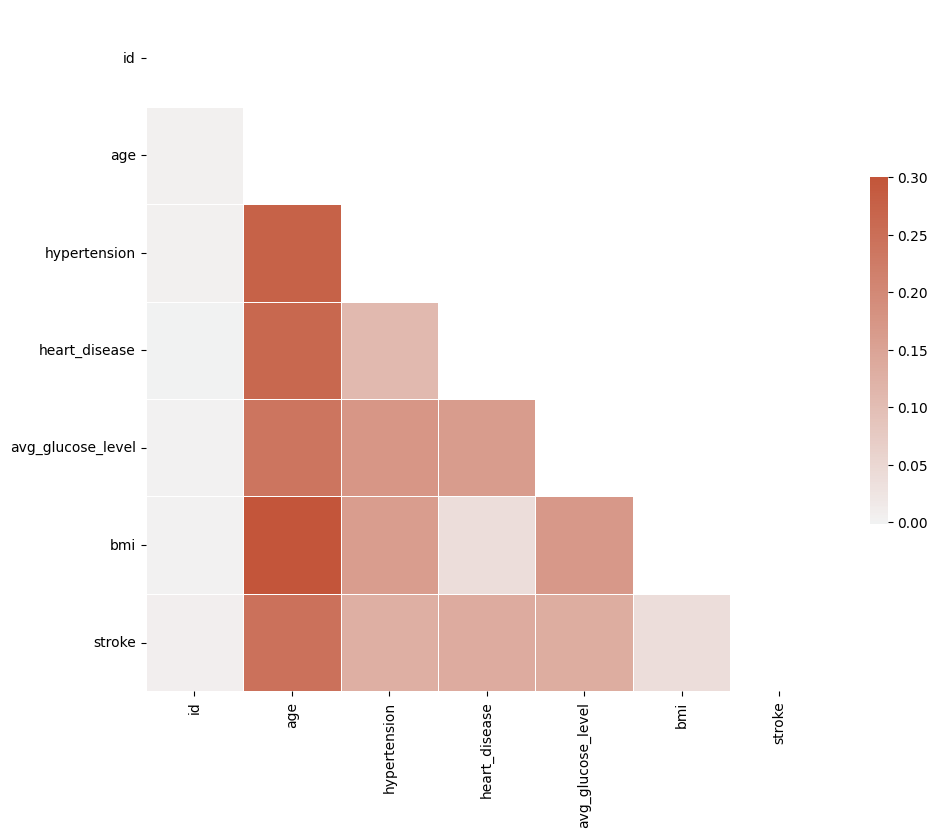

In [ ]:
numerical_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numerical_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### VISUALISASI KOLOM

#### VISUALISASI GENDER

In [ ]:
print(data.gender.value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


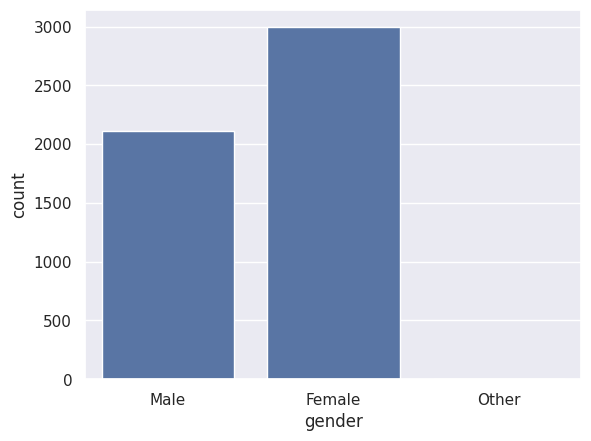

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="gender")
plt.show()

#### VISUALISASI HIPERTENSI

In [ ]:
print(data.hypertension.value_counts())

hypertension
0    4612
1     498
Name: count, dtype: int64


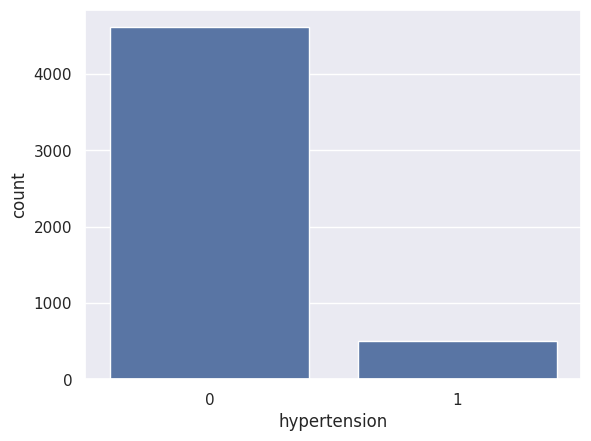

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="hypertension")
plt.show()

#### VISUALISASI STATUS MENIKAH

In [ ]:
print(data.ever_married.value_counts())

ever_married
Yes    3353
No     1757
Name: count, dtype: int64


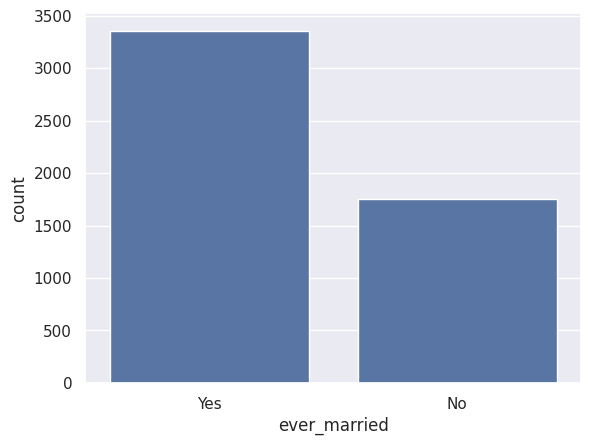

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="ever_married")
plt.show()

#### VISUALISASI TIPE PEKERJAAN

In [ ]:
print(data.work_type.value_counts())

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


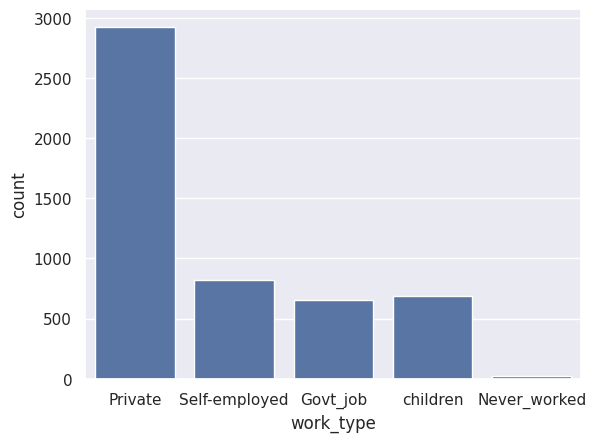

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="work_type")
plt.show()

#### VISUALISASI RESIDENCE TYPE

In [ ]:
print(data.Residence_type.value_counts())

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


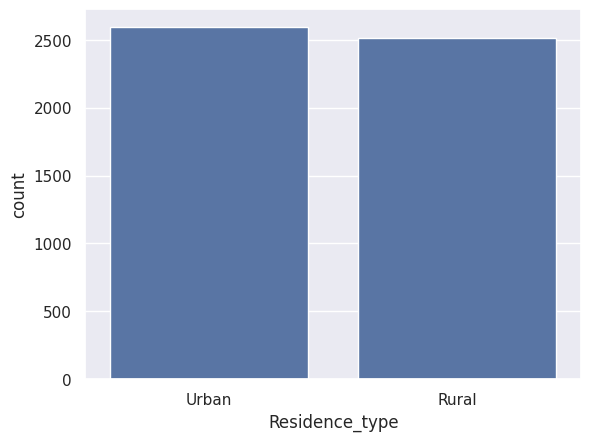

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="Residence_type")
plt.show()

#### VISUALISASI SMOKING STATUS

In [ ]:
print(data.smoking_status.value_counts())

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


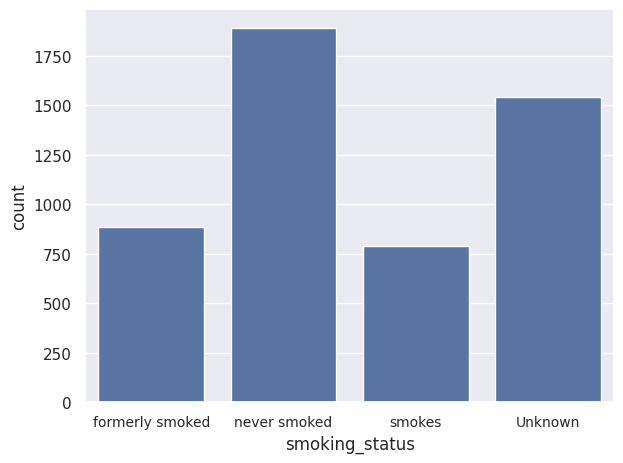

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

#### VISUALISASI STROKE

In [ ]:
print(data.stroke.value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64


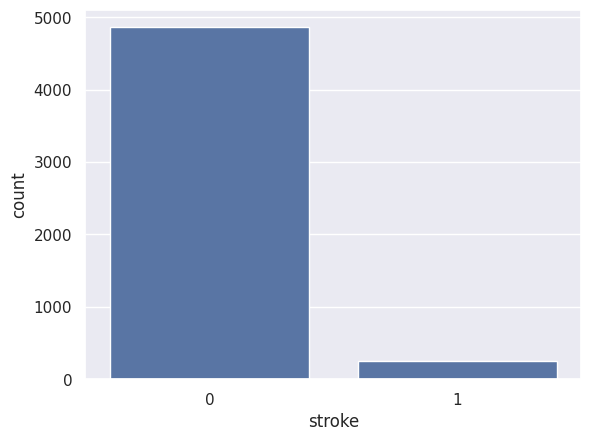

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="stroke")
plt.show()

### DISTRIBUSI DATA PADA DATASET

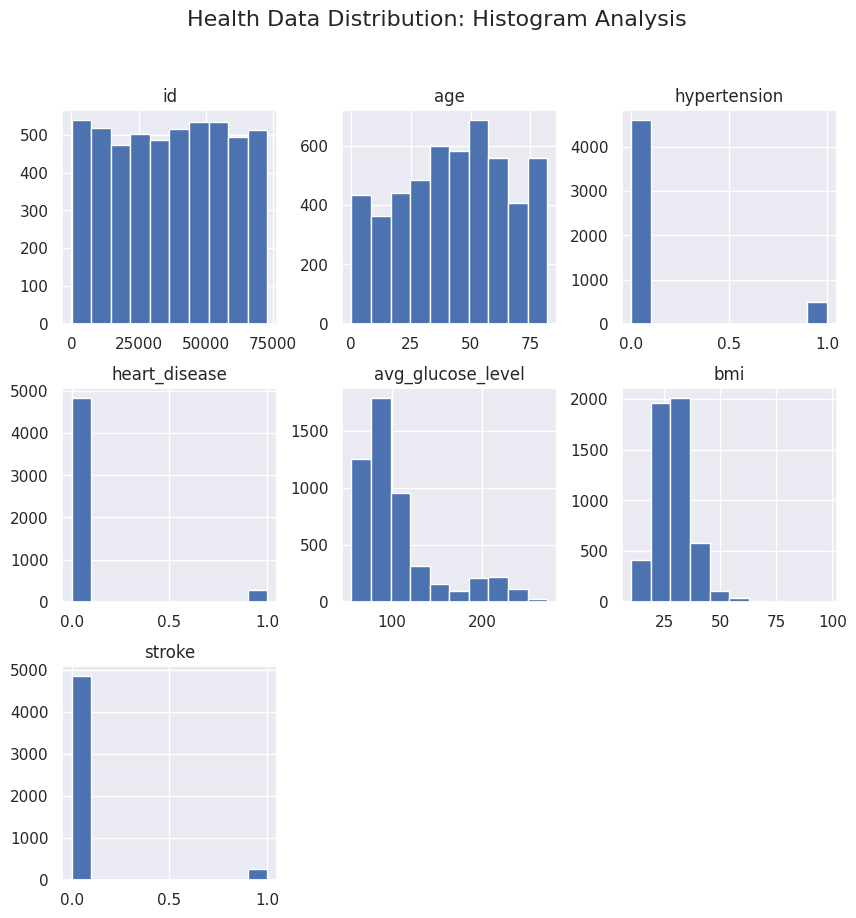

In [ ]:
data.hist(figsize=(10,10))
plt.suptitle('Health Data Distribution: Histogram Analysis', fontsize=16)
plt.show()

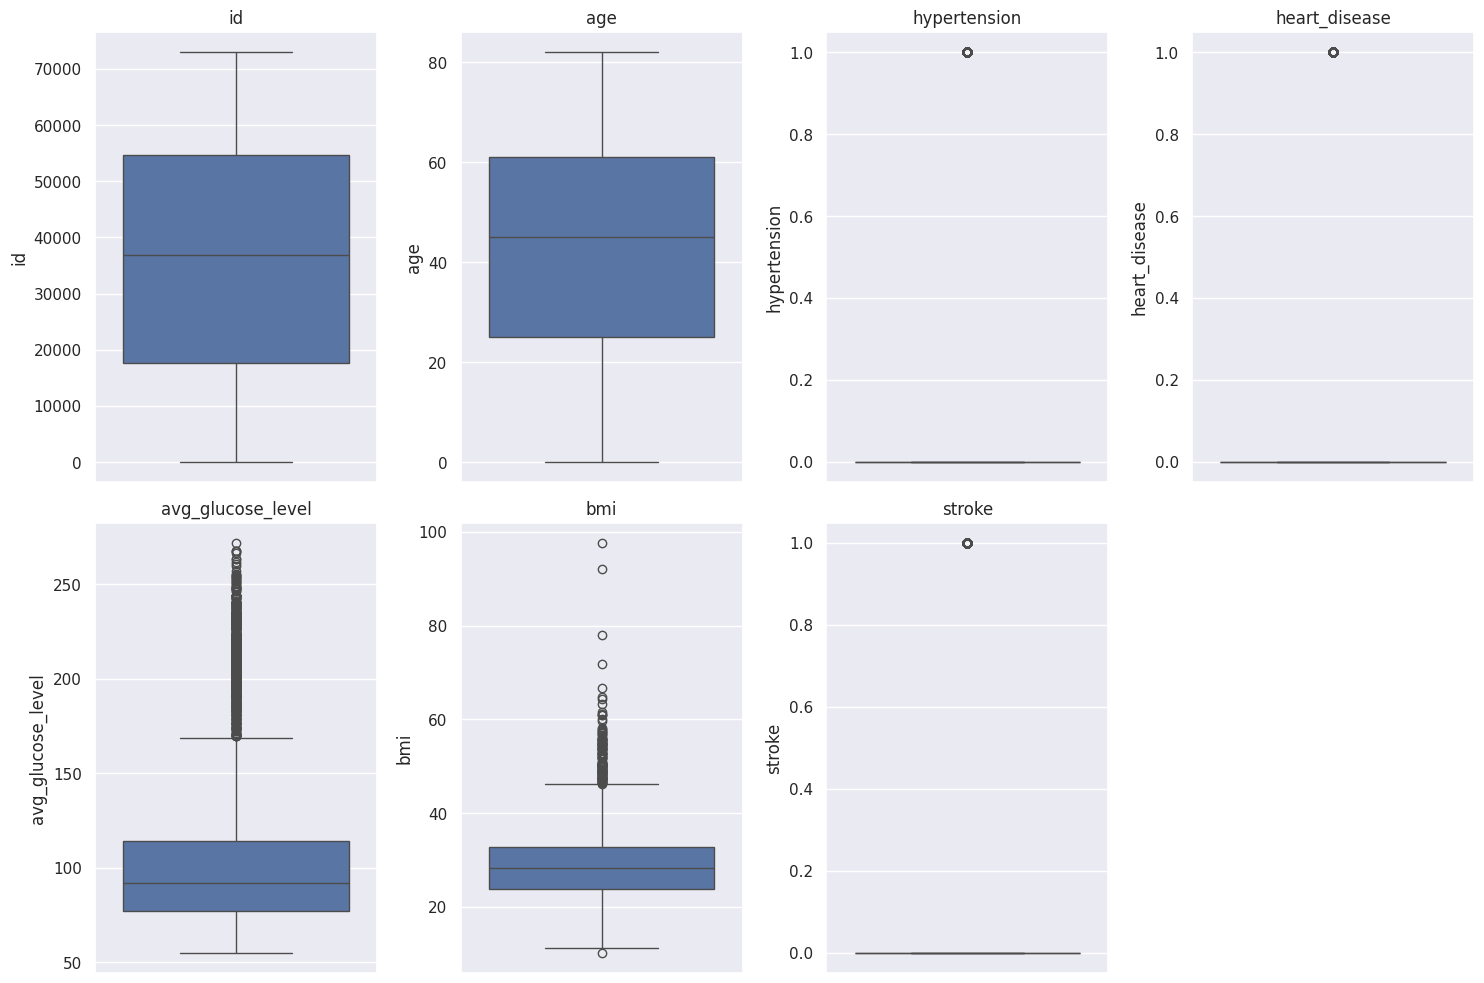

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
n_cols = 4
n_rows = len(numerical_columns) // n_cols + 1

plt.figure(figsize=(15, 5 * n_rows))

# Plot each numerical column as a boxplot
for i, col_name in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data[col_name])
    plt.title(col_name)

# Adjust the layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

#### DISTRIBUSI LEVEL GLUKOSA

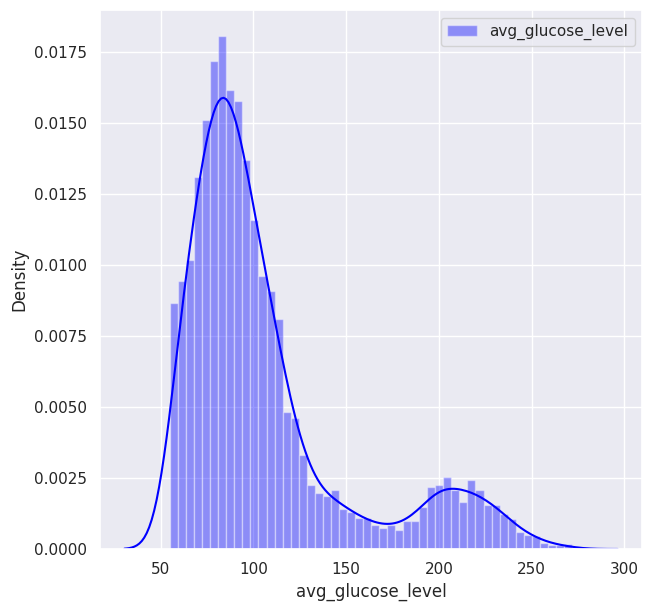

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(data.avg_glucose_level, color="blue", label="avg_glucose_level", kde= True)
plt.legend()

#### DISTRIBUSI BMI

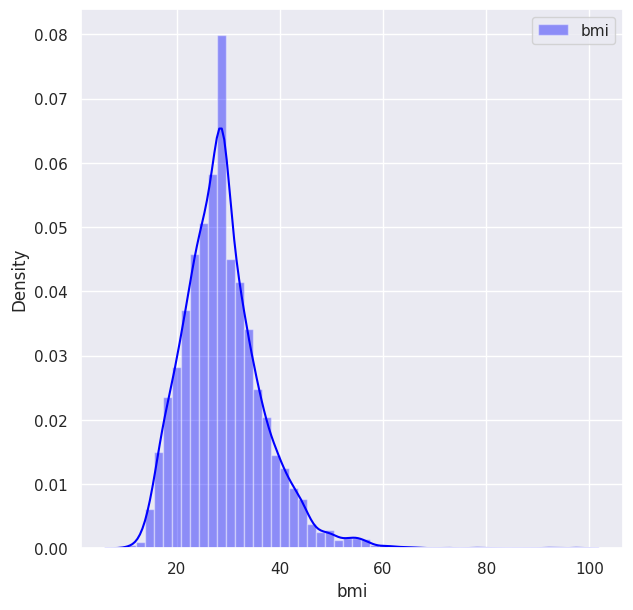

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(data.bmi, color="blue", label="bmi", kde= True)
plt.legend()

#### DISTRIBUSI UMUR

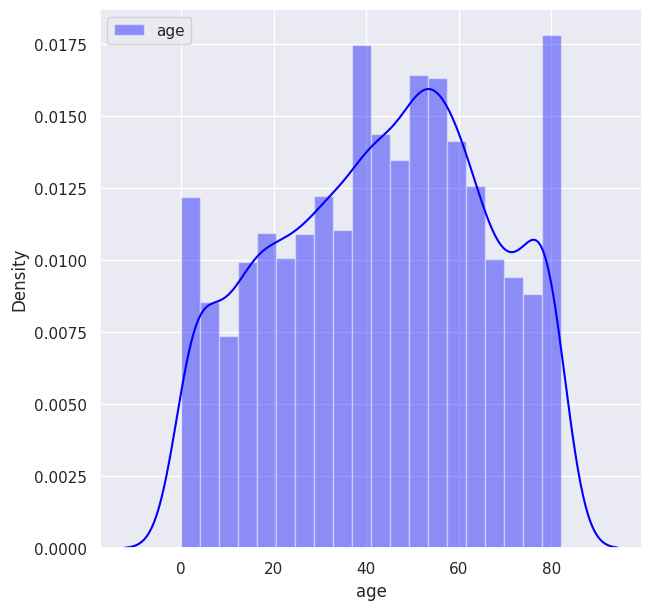

In [ ]:
fig = plt.figure(figsize=(7, 7))
sns.distplot(data.age, color="blue", label="age", kde=True)
plt.legend()
plt.show()


## VISUALISASI (BIVARIATE ANALYSIS)

In [ ]:
category_column = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]
continouse_column = ["age","avg_glucose_level","bmi"]

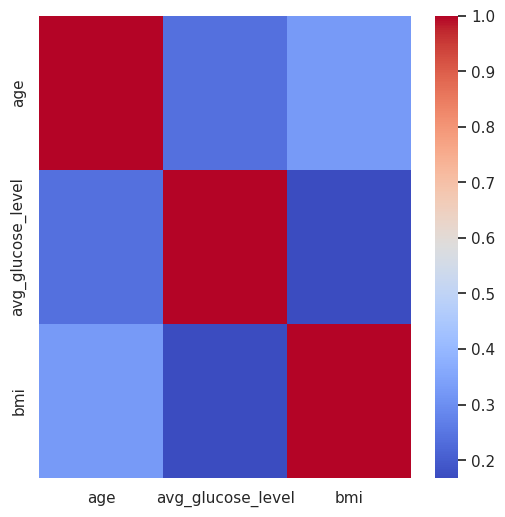

In [ ]:
cr = data[continouse_column].corr(method='pearson')
plt.figure(figsize = (6,6))
sns.heatmap(cr,cmap="coolwarm")
plt.show()

### AGE vs GLUCOSE dengan Stroke

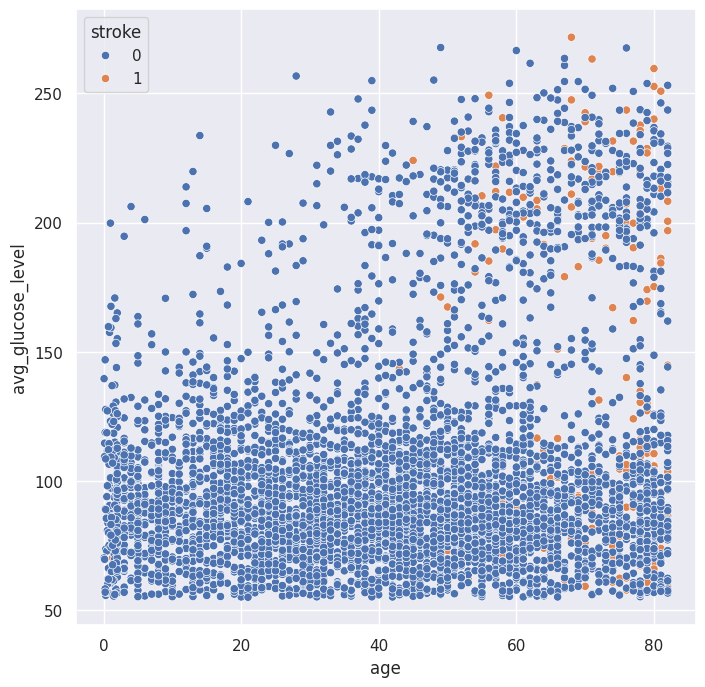

In [ ]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = data, x = 'age', y = 'avg_glucose_level', hue='stroke')
plt.show()

### GLUCOSE vs BMI dengan Stroke

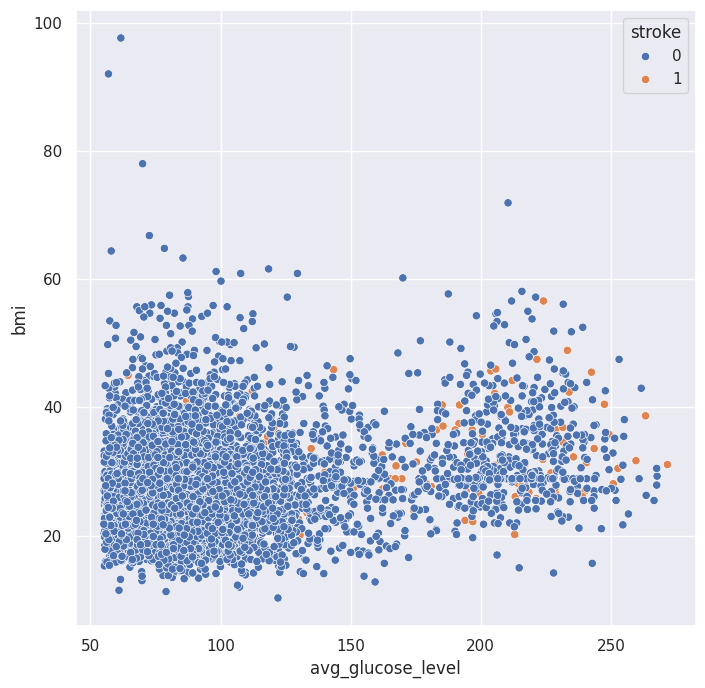

In [ ]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = data, x = 'avg_glucose_level', y = 'bmi', hue='stroke')
plt.show()

### AGE vs BMI dengan Stroke

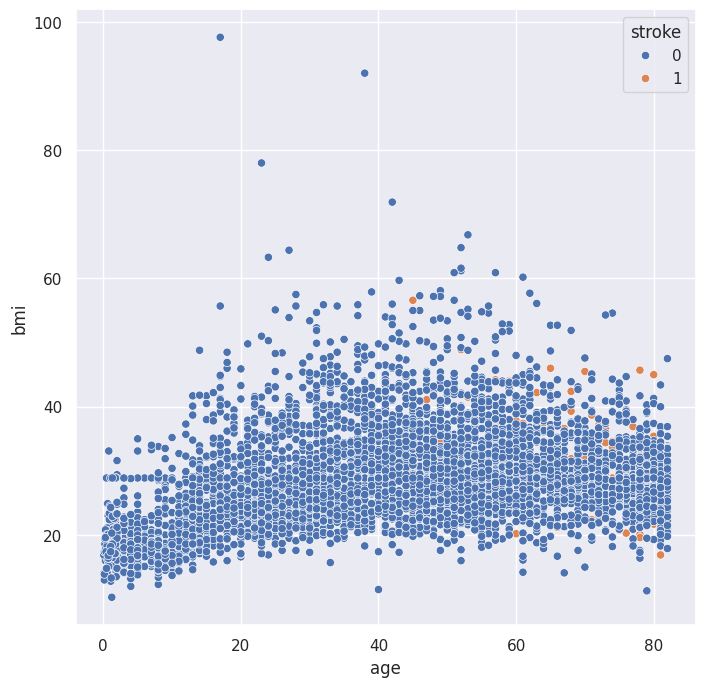

In [ ]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = data, x = 'age', y = 'bmi', hue='stroke')
plt.show()

### PERBANDINGAN Gender dengan Stroke

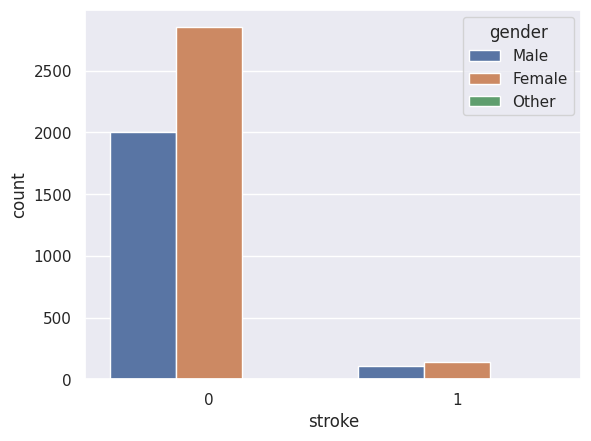

In [ ]:
sns.countplot(x='stroke',hue='gender', data=data)
plt.show()

### PERBANDINGAN Umur dengan Stroke

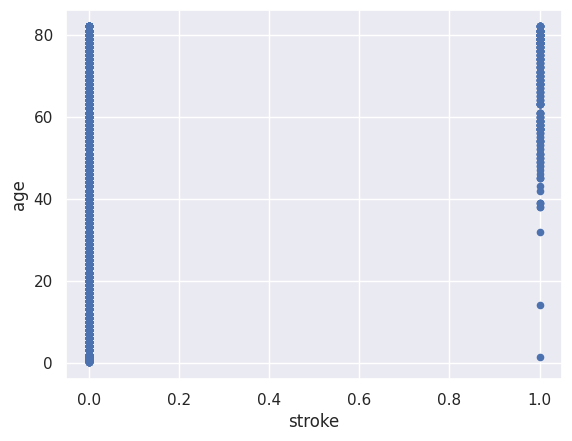

In [ ]:
data.plot(kind='scatter',x='stroke',y='age')
plt.show()

### PERBANDINGAN Umur dengan Tipe Pekerjaan

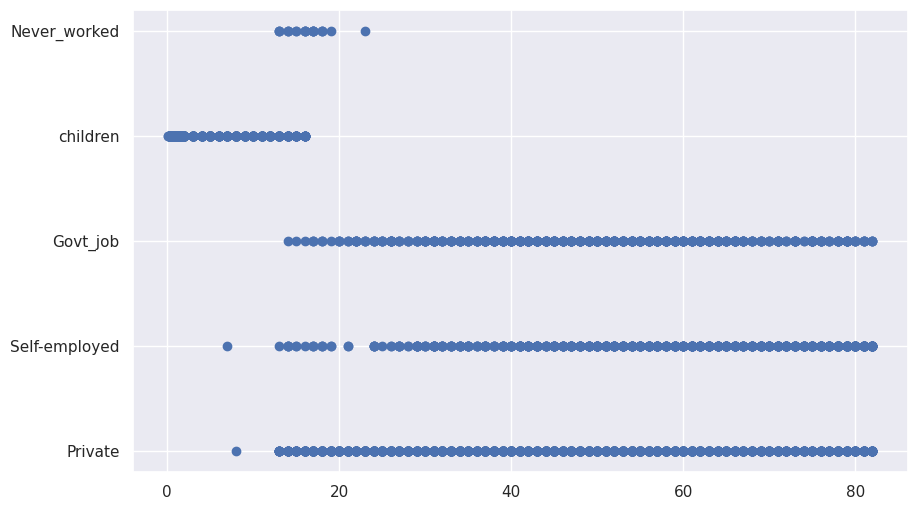

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['work_type'])

### PERBANDINGAN Tipe Pekerjaan dengan Penyakit Jantung

<Axes: xlabel='work_type', ylabel='count'>

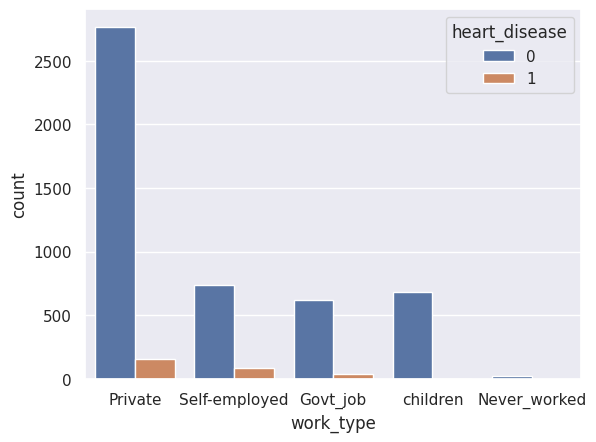

In [ ]:
sns.countplot(x = 'work_type',hue='heart_disease' ,data=data)

### PERBANDINGAN Penyakit Jantung dengan Umur

<Axes: xlabel='heart_disease', ylabel='age'>

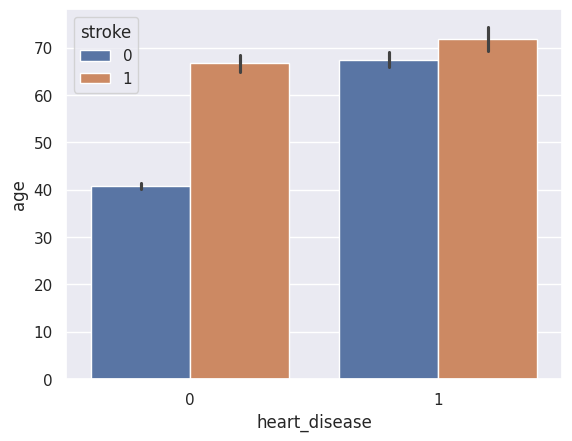

In [ ]:
sns.barplot(x='heart_disease',y='age', hue='stroke' ,data=data)

### PAIR PLOT KESELURUHAN

<Figure size 1000x1000 with 0 Axes>

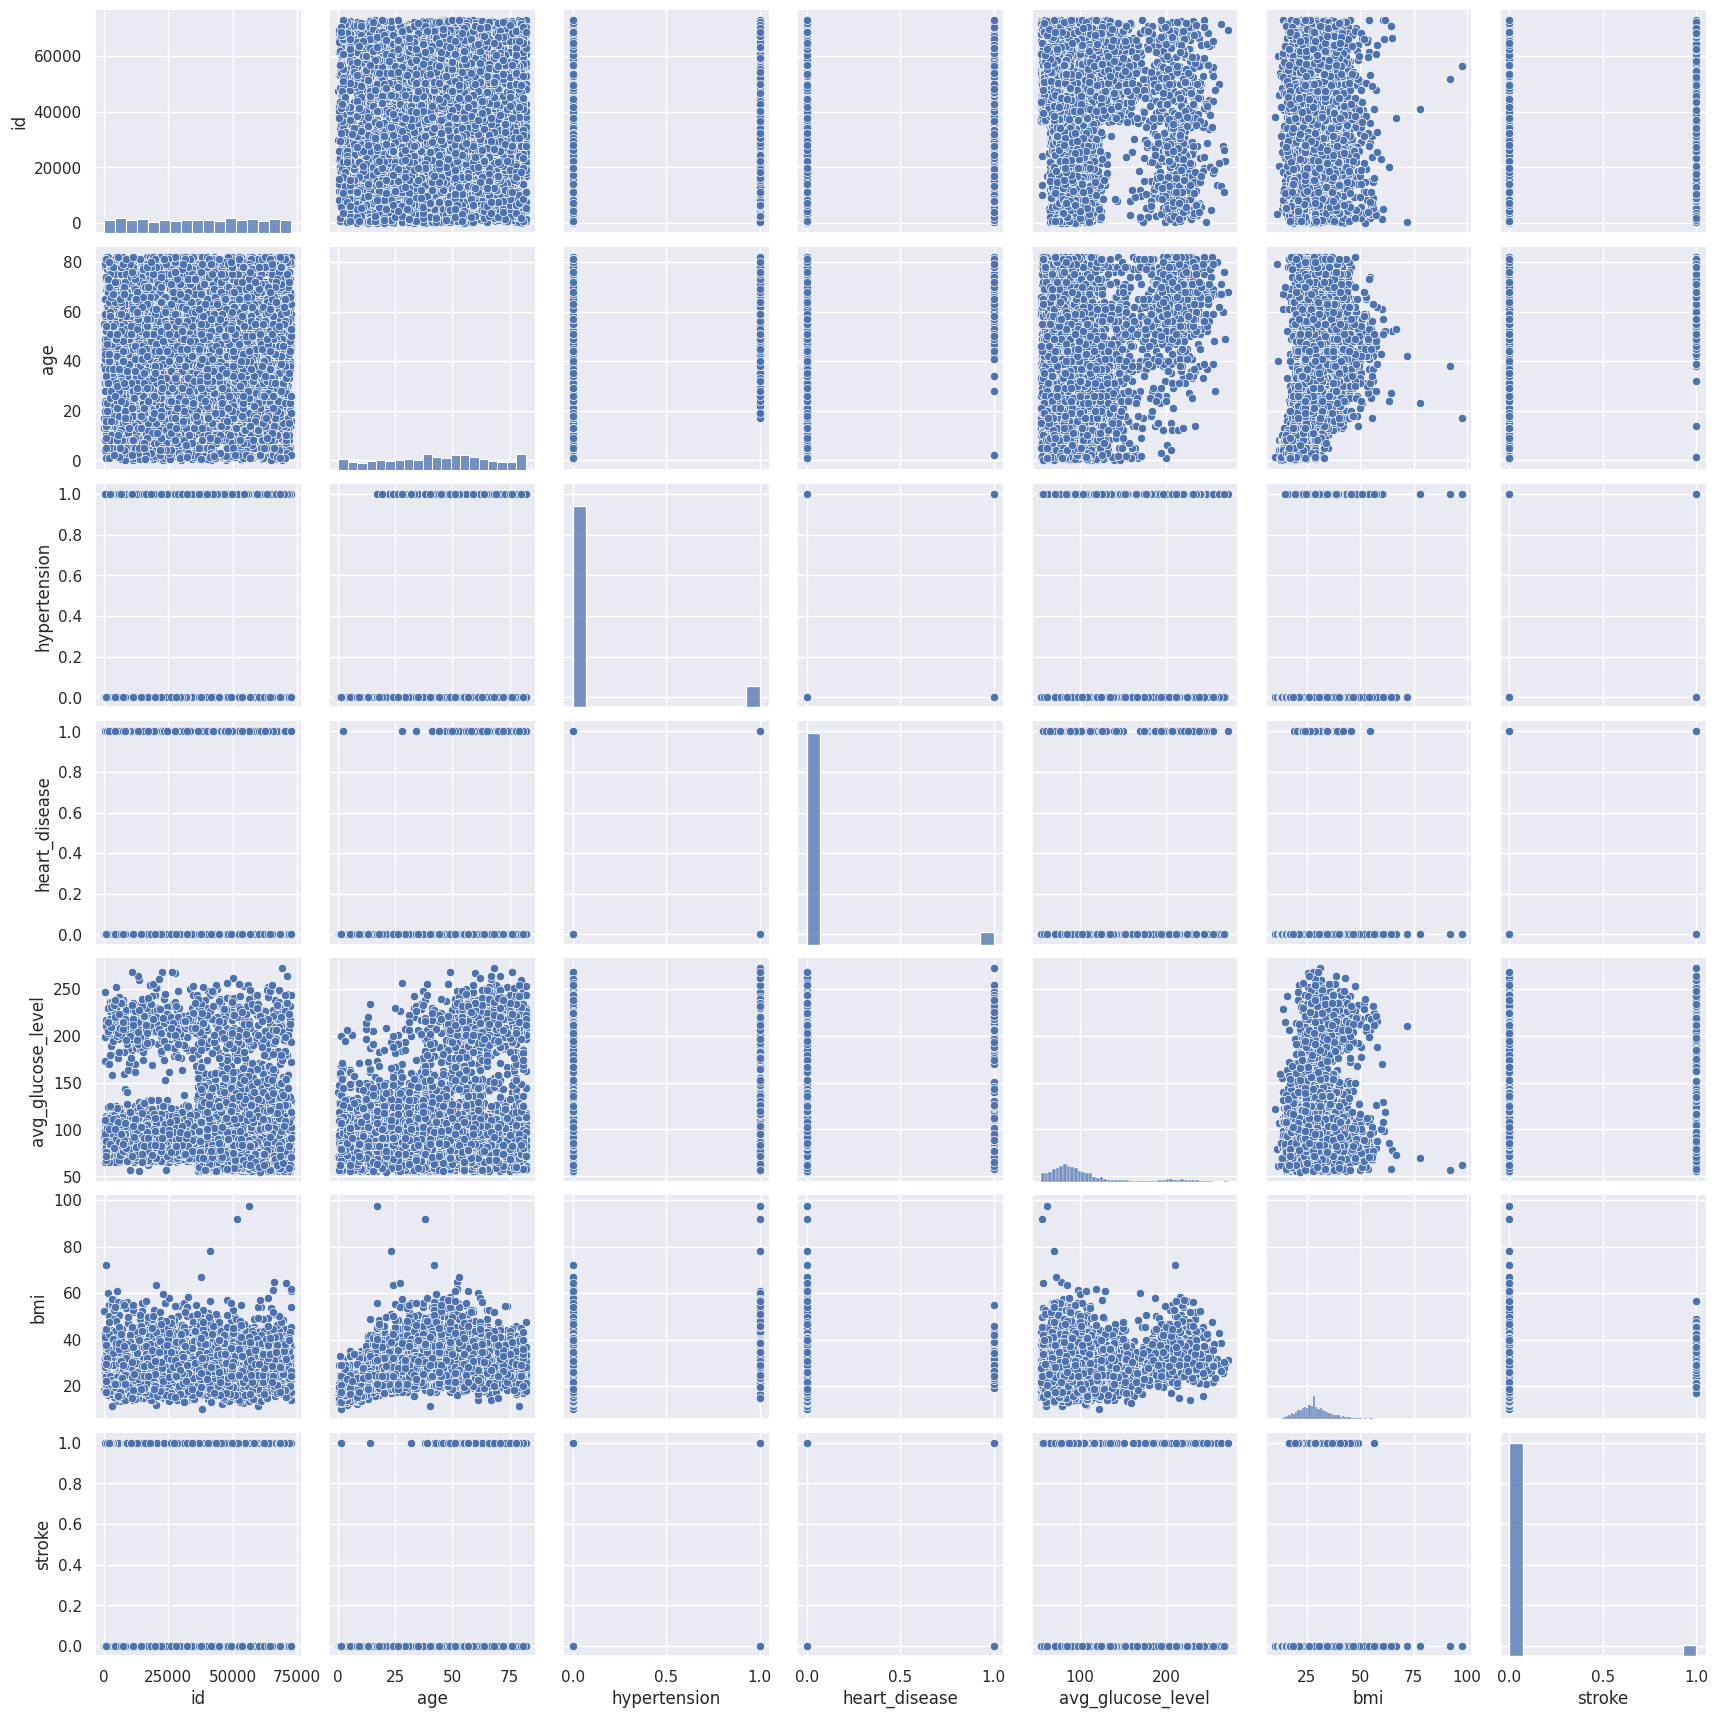

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data)
plt.show()

# PRE-PROCESSING

In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [ ]:
x

array([['Male', 67.0, 0, ..., 228.69, 36.6, 'formerly smoked'],
       ['Female', 61.0, 0, ..., 202.21, 28.893236911794666,
        'never smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

## ENCODING

### ENCODING KATEGORIKAL

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,5,9])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
x

array([[0.0, 1.0, 0.0, ..., 'Urban', 228.69, 36.6],
       [1.0, 0.0, 0.0, ..., 'Rural', 202.21, 28.893236911794666],
       [0.0, 1.0, 0.0, ..., 'Rural', 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 'Rural', 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 'Rural', 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 'Urban', 85.28, 26.2]], dtype=object)

### ENCODING LABEL

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 15] = le.fit_transform(x[:, 15])
x[:, 16] = le.fit_transform(x[:, 16])

In [ ]:
x

array([[0.0, 1.0, 0.0, ..., 1, 228.69, 36.6],
       [1.0, 0.0, 0.0, ..., 0, 202.21, 28.893236911794666],
       [0.0, 1.0, 0.0, ..., 0, 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 0, 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 1, 85.28, 26.2]], dtype=object)

In [ ]:
print('Shape of X: ', x.shape)
print('Shape of Y: ', y.shape)

Shape of X:  (5110, 19)
Shape of Y:  (5110,)


# SPLITING DATASET

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [ ]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (4088, 19)
Number transactions y_train dataset:  (4088,)
Number transactions x_test dataset:  (1022, 19)
Number transactions y_test dataset:  (1022,)


# FETAURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# PERBAIKAN VALUE YANG TIDAK BALANCE DENGAN SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3893 

After OverSampling, the shape of train_X: (7786, 19)
After OverSampling, the shape of train_y: (7786,) 

After OverSampling, counts of label '1': 3893
After OverSampling, counts of label '0': 3893


# MODEL ML

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score,
                             ConfusionMatrixDisplay, precision_score, recall_score,
                             f1_score, classification_report, auc,
                             precision_recall_curve, average_precision_score)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay  # Updated for plotting ROC curve
from sklearn.metrics import PrecisionRecallDisplay  # Updated for plotting Precision-Recall curve

from sklearn.model_selection import cross_val_score

In [ ]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

In [ ]:
lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('Precision: {:.2f}'.format(precision))
    print('Recall: {:.2f}'.format(recall))
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('-----------------------------------')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[750 218]
 [ 15  39]]
Accuracy Score:  0.7720156555772995
K-Fold Validation Mean Accuracy: 79.46 %
Standard Deviation: 1.39 %
ROC AUC Score: 0.75
Precision: 0.15
Recall: 0.72
F1: 0.25
-----------------------------------
-----------------------------------
SVM :
[[794 174]
 [ 32  22]]
Accuracy Score:  0.7984344422700587
K-Fold Validation Mean Accuracy: 88.36 %
Standard Deviation: 1.54 %
ROC AUC Score: 0.61
Precision: 0.11
Recall: 0.41
F1: 0.18
-----------------------------------
-----------------------------------
KNeighbors :
[[837 131]
 [ 36  18]]
Accuracy Score:  0.8365949119373777
K-Fold Validation Mean Accuracy: 90.77 %
Standard Deviation: 0.87 %
ROC AUC Score: 0.60
Precision: 0.12
Recall: 0.33
F1: 0.18
-----------------------------------
-----------------------------------
GaussianNB :
[[145 823]
 [  2  52]]
Accuracy Score:  0.19275929549902152
K-Fold Validation Mean Accuracy: 57.33 %
Standard Deviation: 0.86 %
ROC AUC Score: 0.56
Precision: 0.06
Recall: 0.9

In [ ]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [ ]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [ ]:
df

Model   Accuracy  K-Fold Mean Accuracy  Std. Deviation  \
7              XGBoost  91.976517             95.107316        3.770300   
6        Random Forest  90.606654             95.967343        1.377559   
5        Decision Tree  86.007828             90.393013        2.936513   
2           KNeighbors  83.659491             90.765631        0.866181   
1                  SVM  79.843444             88.363831        1.536875   
0  Logistic Regreesion  77.201566             79.462926        1.391926   
4          BernoulliNB  60.567515             72.938676        1.593421   
3           GaussianNB  19.275930             57.333590        0.861249   

    ROC AUC  Precision    Recall        F1  
7  0.537994   0.150000  0.111111  0.127660  
6  0.522019   0.096154  0.092593  0.094340  
5  0.515228   0.067961  0.129630  0.089172  
2  0.599001   0.120805  0.333333  0.177340  
1  0.613828   0.112245  0.407407  0.176000  
0  0.748508   0.151751  0.722222  0.250804  
4  0.713154   0.102506  0.833333  0.182556  
3  0.556378   0.059429  0.962963  0.111948

## TUNING MODEL HYPERPARAMETER

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]),
#                (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),
#                (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]),
#                (GaussianNB(),[{'var_smoothing': [1e-09]}]),
#                (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]),
#                (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]),
#                (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
#               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [ ]:
grid_models = [
    # Logistic Regression
    (LogisticRegression(), [
        {'C': [0.01, 0.1, 0.25, 0.5, 0.75, 1, 10],
         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
         'solver': ['liblinear', 'saga'],
         'random_state': [0]}
    ]),

    # K-Nearest Neighbors
    (KNeighborsClassifier(), [
        {'n_neighbors': [3, 5, 7, 8, 10, 15],
         'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
         'weights': ['uniform', 'distance'],
         'p': [1, 2]}  # p=1 for Manhattan, p=2 for Euclidean
    ]),

    # Support Vector Machine
    (SVC(), [
        {'C': [0.01, 0.1, 0.25, 0.5, 0.75, 1],
         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
         'degree': [2, 3, 4],  # For polynomial kernel
         'gamma': ['scale', 'auto'],
         'random_state': [0]}
    ]),

    # Gaussian Naive Bayes
    (GaussianNB(), [
        {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]}
    ]),

    # Bernoulli Naive Bayes
    (BernoulliNB(), [
        {'alpha': [0.1, 0.25, 0.5, 0.75, 1, 2],
         'binarize': [0.0, 0.5, 1.0]}  # Threshold for binarization
    ]),

    # Decision Tree
    (DecisionTreeClassifier(), [
        {'criterion': ['gini', 'entropy', 'log_loss'],
         'splitter': ['best', 'random'],
         'max_depth': [None, 10, 20, 30],
         'min_samples_split': [2, 5, 10],
         'random_state': [0]}
    ]),

    # Random Forest
    (RandomForestClassifier(), [
        {'n_estimators': [50, 100, 150, 200],
         'criterion': ['gini', 'entropy'],
         'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10],
         'max_features': ['sqrt', 'log2'],
         'random_state': [0]}
    ]),

    # XGBoost
    (XGBClassifier(), [
        {'learning_rate': [0.01, 0.05, 0.1, 0.2],
         'max_depth': [3, 5, 7, 10],
         'n_estimators': [100, 150, 200],
         'subsample': [0.6, 0.8, 1.0],
         'colsample_bytree': [0.6, 0.8, 1.0],
         'eval_metric': ['error', 'logloss']}
    ])
]


In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('-------------------------')
    print('-------------------------')

LogisticRegression():
Best Accuracy : 79.54%
Best Parameters :  {'C': 0.01, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}
------------------------
-------------------------
KNeighborsClassifier():
Best Accuracy : 93.60%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
------------------------
-------------------------
SVC():
Best Accuracy : 88.36%
Best Parameters :  {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 0}
------------------------
-------------------------
GaussianNB():
Best Accuracy : 58.53%
Best Parameters :  {'var_smoothing': 1e-06}
------------------------
-------------------------
BernoulliNB():
Best Accuracy : 76.41%
Best Parameters :  {'alpha': 0.1, 'binarize': 0.5}
------------------------
-------------------------
DecisionTreeClassifier():
Best Accuracy : 92.13%
Best Parameters :  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'random'}
-

## EVALUASI MODEL

### LOGISTIC REGRESSION

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       968
           1       0.14      0.70      0.23        54

    accuracy                           0.75      1022
   macro avg       0.56      0.73      0.54      1022
weighted avg       0.93      0.75      0.82      1022

ROC AUC score: 0.802877257422712
Accuracy Score:  0.7475538160469667


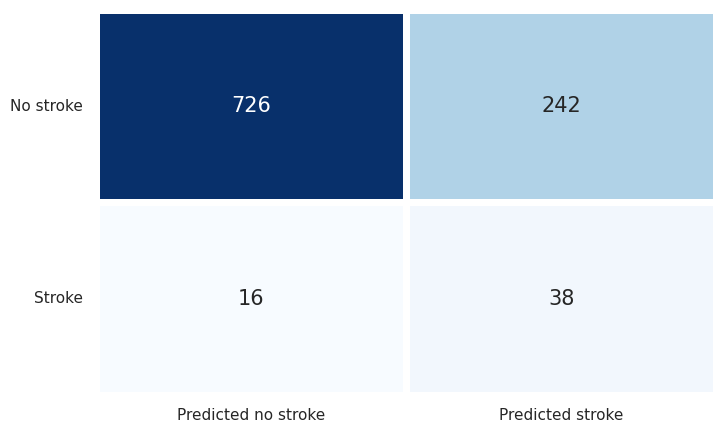

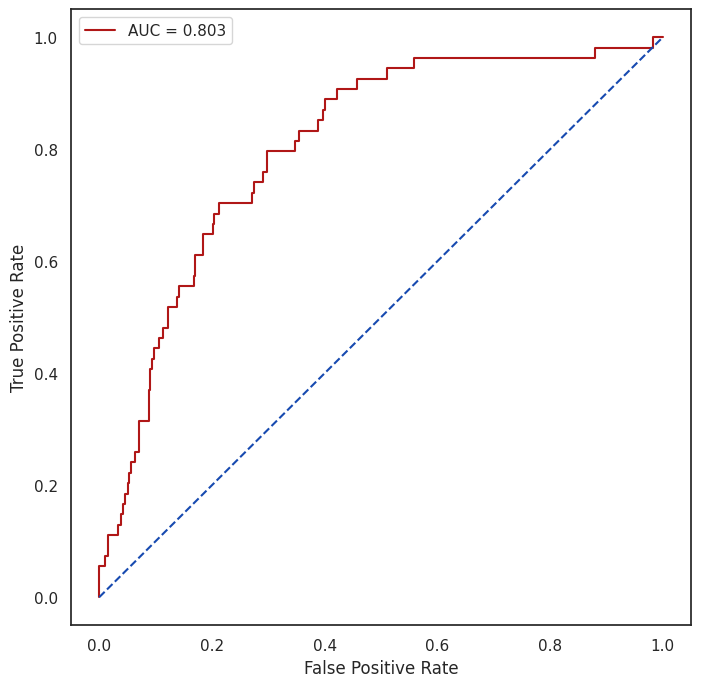

In [ ]:
classifier = LogisticRegression(C=0.01, penalty='l1', random_state=0, solver='liblinear')
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### KNN

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       968
           1       0.08      0.15      0.11        54

    accuracy                           0.87      1022
   macro avg       0.52      0.53      0.52      1022
weighted avg       0.90      0.87      0.89      1022

ROC AUC score: 0.59032560453015
Accuracy Score:  0.8679060665362035


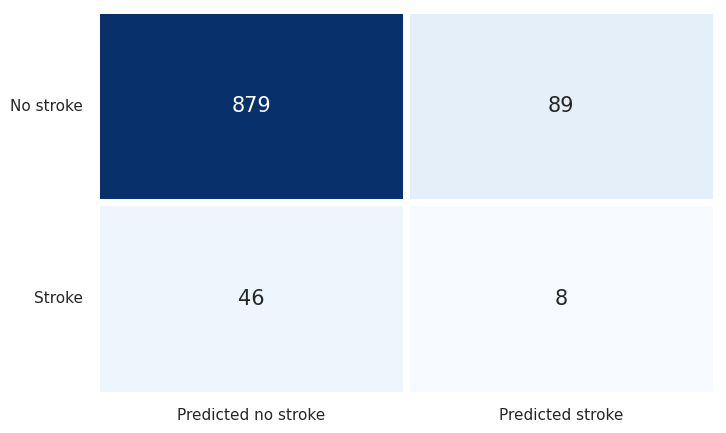

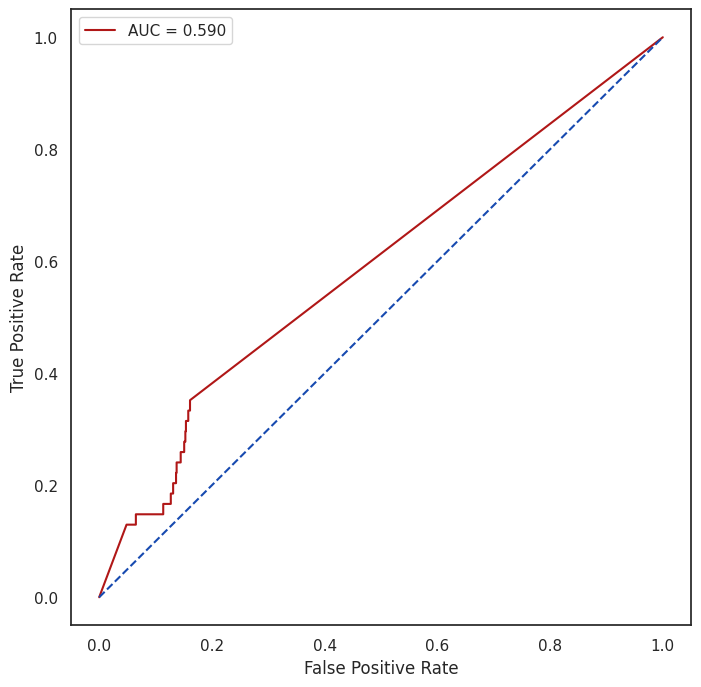

In [ ]:
#Fitting RandomForest Model
classifier = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3, p= 1, weights= 'distance')
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### SVM

              precision    recall  f1-score   support

           0       0.96      0.82      0.89       968
           1       0.11      0.41      0.18        54

    accuracy                           0.80      1022
   macro avg       0.54      0.61      0.53      1022
weighted avg       0.92      0.80      0.85      1022

ROC AUC score: 0.7194865319865319
Accuracy Score:  0.7984344422700587


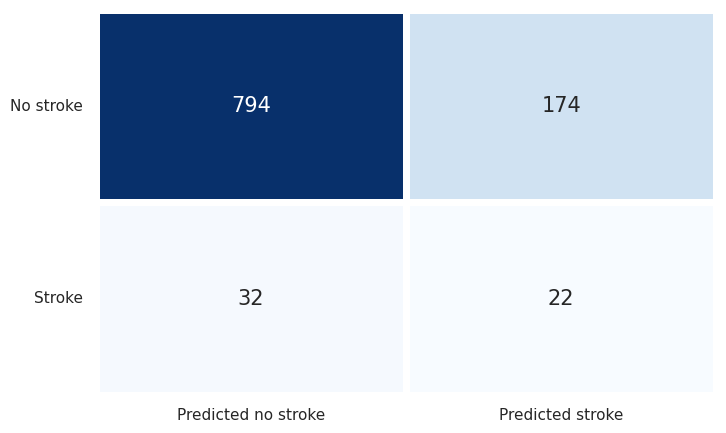

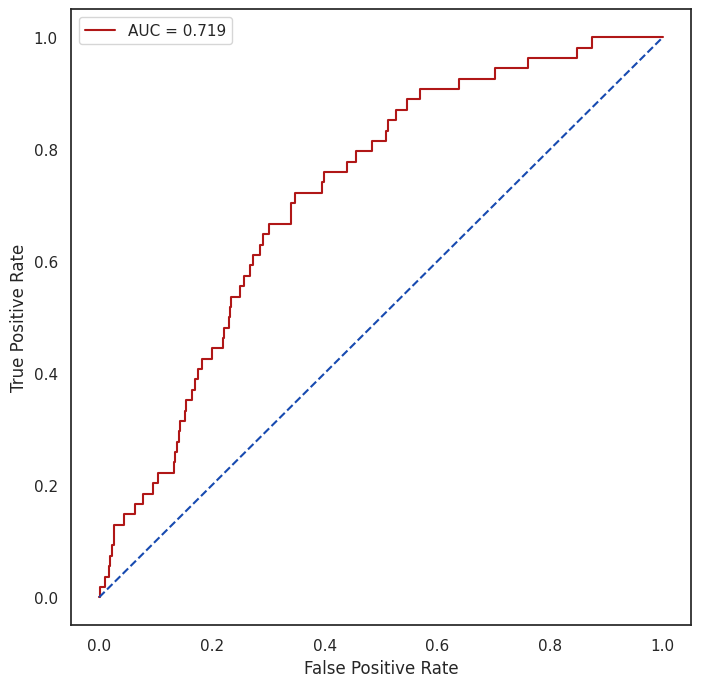

In [ ]:
#Fitting RandomForest Model
classifier = SVC(C= 1, degree= 2, gamma= 'scale', kernel= 'rbf', random_state= 0, probability=True)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### NAIVE BAYES (BERNOULLI)

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       968
           1       0.14      0.78      0.23        54

    accuracy                           0.73      1022
   macro avg       0.56      0.75      0.53      1022
weighted avg       0.94      0.73      0.80      1022

ROC AUC score: 0.8005528772574227
Accuracy Score:  0.7270058708414873


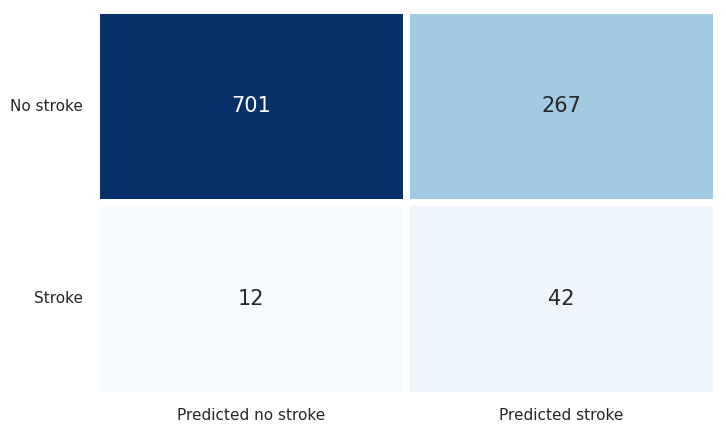

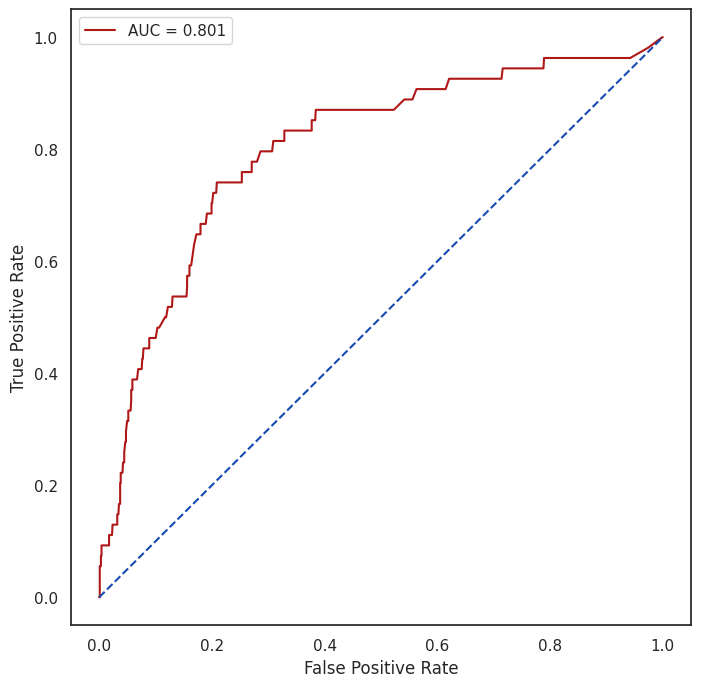

In [ ]:
#Fitting RandomForest Model
classifier = BernoulliNB(alpha= 0.1, binarize= 0.5)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### NAIVE BAYES (GAUSSIAN)

              precision    recall  f1-score   support

           0       0.99      0.16      0.28       968
           1       0.06      0.96      0.11        54

    accuracy                           0.20      1022
   macro avg       0.52      0.56      0.19      1022
weighted avg       0.94      0.20      0.27      1022

ROC AUC score: 0.7962102081420264
Accuracy Score:  0.2025440313111546


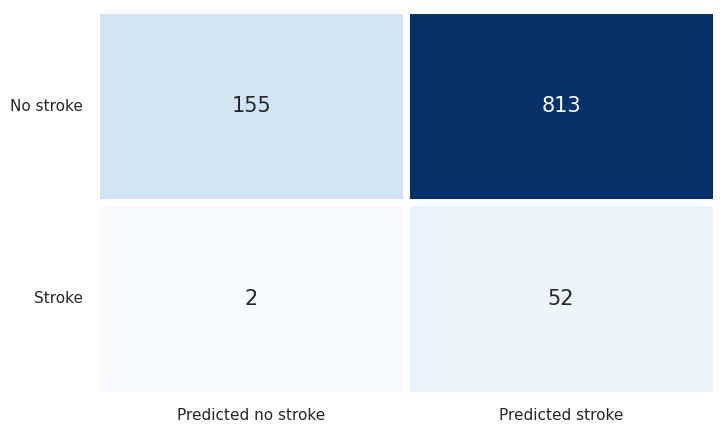

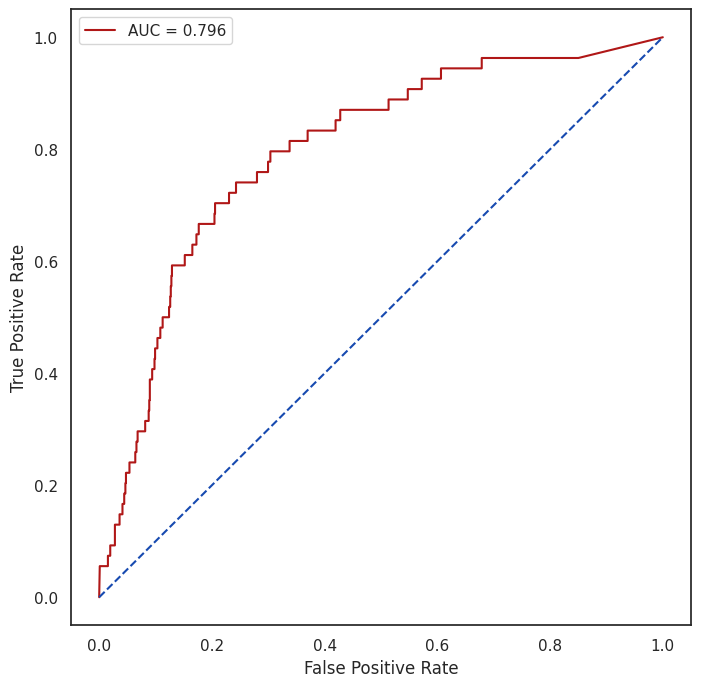

In [ ]:
#Fitting RandomForest Model
classifier = GaussianNB(var_smoothing= 1e-06)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### DECISION TREE

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       968
           1       0.06      0.11      0.08        54

    accuracy                           0.86      1022
   macro avg       0.50      0.51      0.50      1022
weighted avg       0.90      0.86      0.88      1022

ROC AUC score: 0.507346189164371
Accuracy Score:  0.8620352250489237


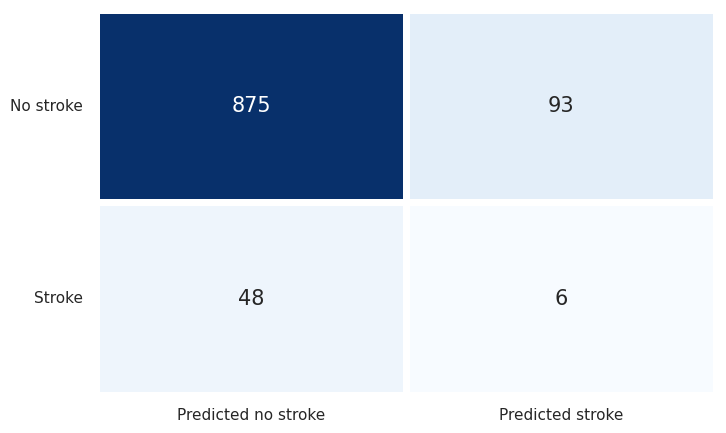

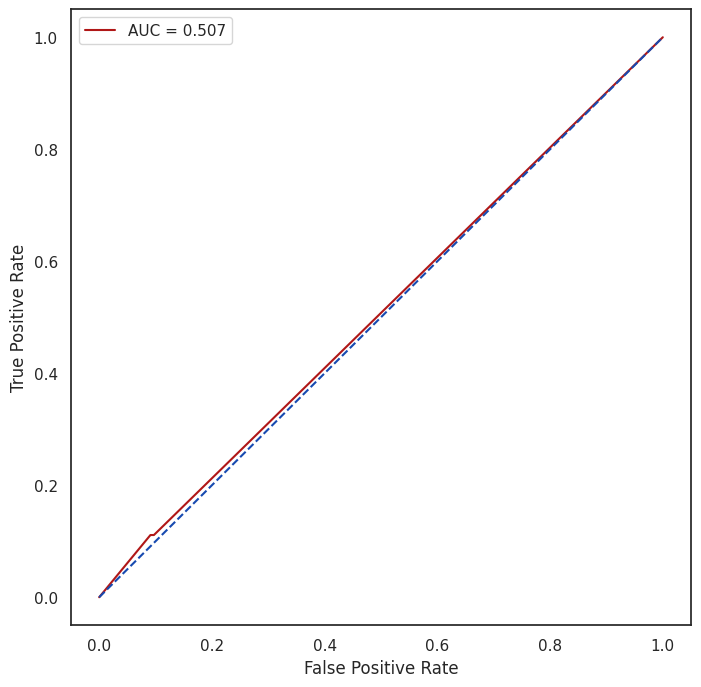

In [ ]:
#Fitting RandomForest Model
classifier = DecisionTreeClassifier(criterion= 'entropy', max_depth= 30, min_samples_split= 2, random_state= 0, splitter= 'random')
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### RANDOM FOREST

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       968
           1       0.10      0.09      0.09        54

    accuracy                           0.91      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.90      0.91      0.91      1022

ROC AUC score: 0.7328397612488522
Accuracy Score:  0.9060665362035225


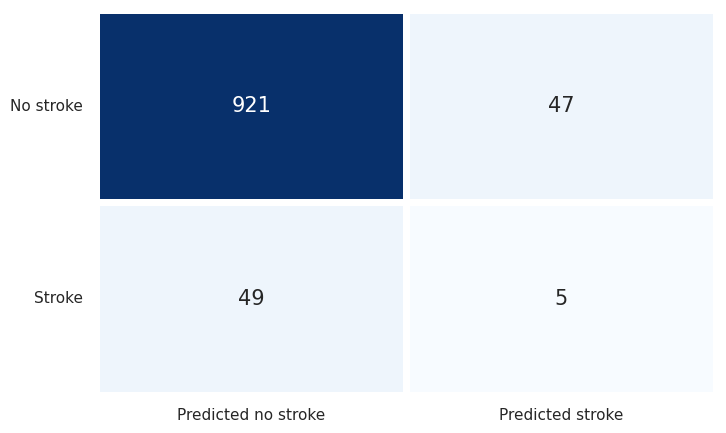

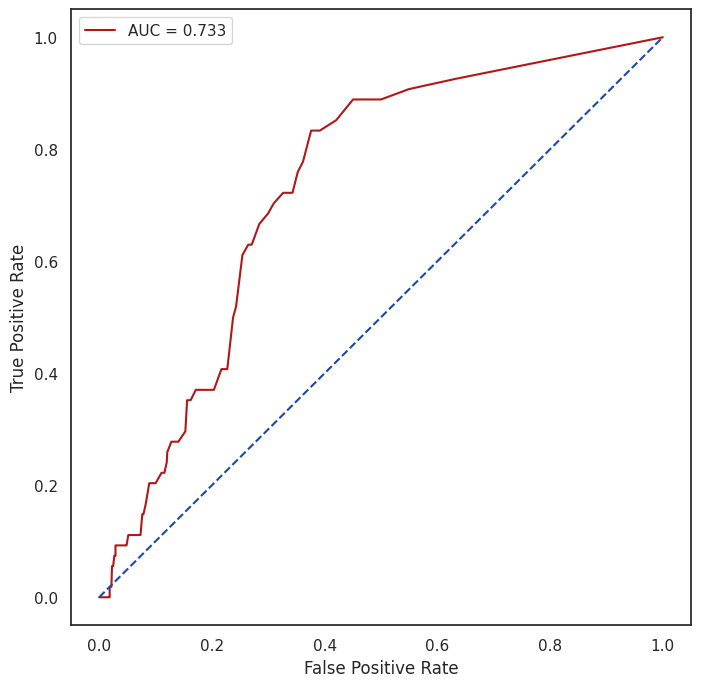

In [ ]:
#Fitting RandomForest Model
classifier = RandomForestClassifier(criterion= 'gini', max_depth= None, max_features= 'sqrt', min_samples_split= 2, n_estimators= 100, random_state= 0)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### XGBOOST

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       968
           1       0.16      0.22      0.19        54

    accuracy                           0.90      1022
   macro avg       0.56      0.58      0.57      1022
weighted avg       0.91      0.90      0.91      1022

ROC AUC score: 0.7513965411692685
Accuracy Score:  0.8972602739726028


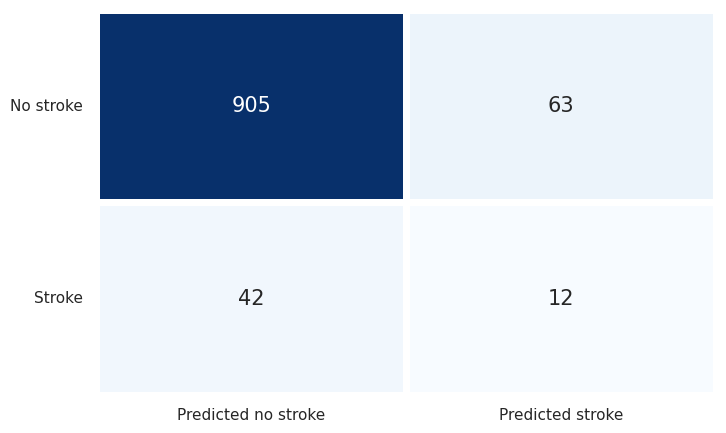

Text(0.5, 0, 'False Positive Rate')

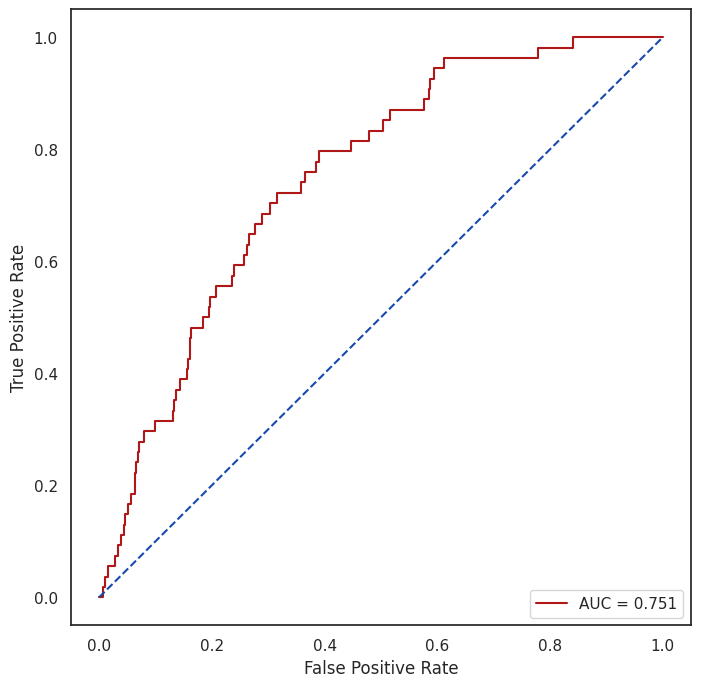

In [ ]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# MODEL DL

## ANN

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.regularizers import l2

In [ ]:
# Define the custom Keras classifier
class KerasClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, batch_size=32, epochs=50, **kwargs):
        self.build_fn = build_fn
        self.batch_size = batch_size
        self.epochs = epochs
        self.kwargs = kwargs

    def fit(self, X, y):
        self.model = self.build_fn(**self.kwargs)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1)
        return self

    def predict(self, X):
        return self.model.predict(X).round()  # rounding for binary classification


In [ ]:
# Build the ANN model
def ann_classifier():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dense(units=8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.6))  # Now dropout is properly added to the model
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return ann

In [ ]:
# Prepare the KerasClassifierCustom wrapper for cross-validation
ann = KerasClassifierCustom(build_fn=ann_classifier, batch_size=32, epochs=50)

In [ ]:
# Perform 5-fold cross-validation
accuracies = cross_val_score(estimator=ann, X=x_train_res, y=y_train_res, cv=5)

Epoch 1/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5338 - loss: 0.8724
Epoch 2/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6080 - loss: 0.7500
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6581 - loss: 0.6633
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6644 - loss: 0.6225
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6896 - loss: 0.5889
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7520 - loss: 0.5599
Epoch 7/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7569 - loss: 0.5562
Epoch 8/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7678 - loss: 0.5405
Epoch 9/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7671 - loss: 0.5196
Epoch 10/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7673 - loss: 0.5203
Epoch 11/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7724 - loss: 0.5121
Epoch 12/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [ ]:
# Checking the mean and standard deviation of the accuracies obtained
mean = accuracies.mean()
std_deviation = accuracies.std()
print("Accuracy: {:.2f} %".format(mean * 100))
print("Standard Deviation: {:.2f} %".format(std_deviation * 100))

Accuracy: 84.29 %
Standard Deviation: 1.61 %


## TUNING HYPERPARAMETER ANN

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.regularizers import l2
from sklearn.base import BaseEstimator, ClassifierMixin

In [ ]:
# Define the Custom KerasClassifier class
class KerasClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, batch_size=32, epochs=50, optimizer='adam'):
        self.build_fn = build_fn
        self.batch_size = batch_size
        self.epochs = epochs
        self.optimizer = optimizer  # Add optimizer as a parameter
        self.model = None

    def fit(self, X, y):
        # Pass optimizer to the build_fn during model creation
        self.model = self.build_fn(optimizer=self.optimizer)
        self.model.fit(X, y, batch_size=self.batch_size, epochs=self.epochs, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

    def score(self, X, y):
        return self.model.evaluate(X, y, verbose=0)[1]

In [ ]:
# Building the ANN model
def ann_classifier(optimizer='adam'):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dense(units=8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.6))  # Dropout added correctly
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return ann

In [ ]:
# Wrapping the model with KerasClassifierCustom
ann = KerasClassifierCustom(build_fn=ann_classifier, batch_size=32, epochs=50)


In [ ]:
# Grid Search CV for hyperparameter tuning
parameters = {'batch_size': [25, 32],
              'epochs': [50, 100, 150],
              'optimizer': ['adam', 'rmsprop']}  # Now optimizer is a valid parameter

grid_search = GridSearchCV(estimator=ann, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model with the training data
grid_search.fit(x_train_res, y_train_res)

GridSearchCV(cv=5,
             estimator=KerasClassifierCustom(build_fn=<function ann_classifier at 0x0000027C4C3F84A0>),
             n_jobs=-1,
             param_grid={'batch_size': [25, 32], 'epochs': [50, 100, 150],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy')

In [ ]:
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Parameters: {'batch_size': 25, 'epochs': 50, 'optimizer': 'adam'}


### EVALUASI MODEL SETELAH TUNING HYPERPARAMETER

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units= 32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
ann.add(tf.keras.layers.Dense(units= 32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
tf.keras.layers.Dropout(0.6)
ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
ann_history = ann.fit(x_train_res, y_train_res, batch_size= 25, epochs= 150, validation_split= 0.2)

Epoch 1/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6757 - loss: 1.0023 - val_accuracy: 0.7612 - val_loss: 0.7787
Epoch 2/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7935 - loss: 0.6024 - val_accuracy: 0.7381 - val_loss: 0.6864
Epoch 3/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8057 - loss: 0.5059 - val_accuracy: 0.8171 - val_loss: 0.5746
Epoch 4/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8046 - loss: 0.4786 - val_accuracy: 0.7246 - val_loss: 0.6745
Epoch 5/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8192 - loss: 0.4451 - val_accuracy: 0.8113 - val_loss: 0.5491
Epoch 6/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8210 - loss: 0.4358 - val_accuracy: 0.8273 - val_loss: 0.5226
Epoch 7/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8229 - loss: 0.4267 - val_accuracy: 0.8132 - val_loss: 0.5347
Epoch 8/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8360 - loss: 0.4203 - val_accu

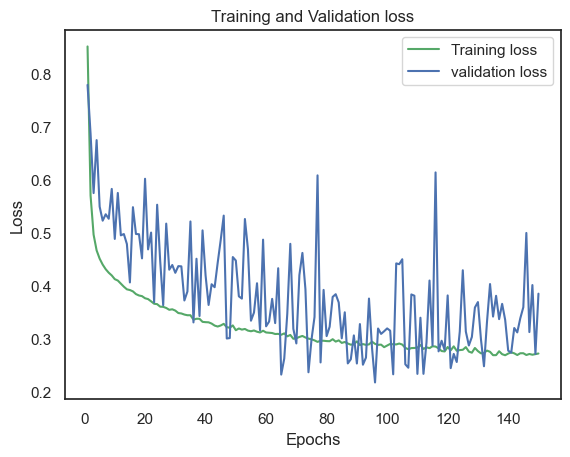

In [ ]:
loss_train = ann_history.history['loss']
loss_val = ann_history.history['val_loss']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


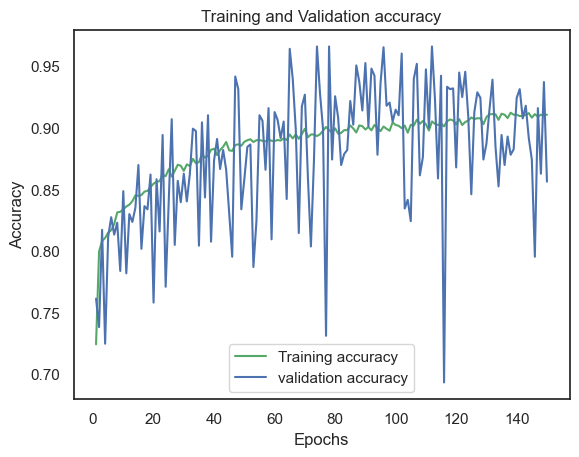

In [ ]:
loss_train = ann_history.history['accuracy']
loss_val = ann_history.history['val_accuracy']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f} %'.format(accuracy * 100))

Accuracy: 89.73 %


Confusion Matrix:
 [[905  63]
 [ 42  12]]
Accuracy:  0.8972602739726028


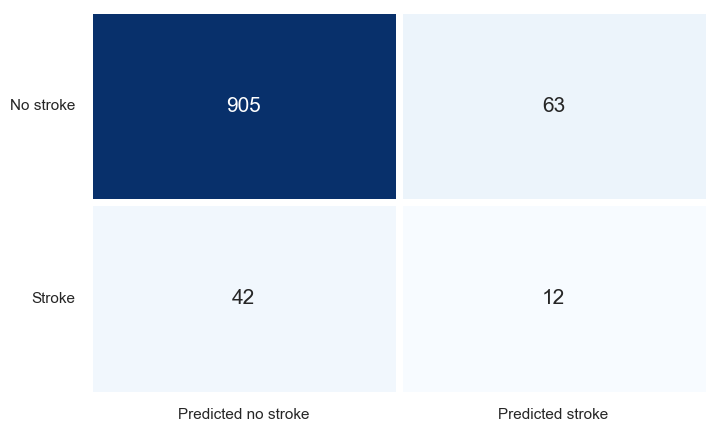

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)

# Calculate the Accuracy
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy: ',accuracy)

#Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

## RNN

In [ ]:
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import SimpleRNN, Dropout

In [ ]:
# Define the custom Keras classifier
class KerasClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, batch_size=32, epochs=50, **kwargs):
        self.build_fn = build_fn
        self.batch_size = batch_size
        self.epochs = epochs
        self.kwargs = kwargs

    def fit(self, X, y):
        self.model = self.build_fn(**self.kwargs)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1)
        return self

    def predict(self, X):
        return self.model.predict(X).round()  # rounding for binary classification


In [ ]:
# Build the RNN model (SimpleRNN)
def rnn_classifier():
    rnn = tf.keras.models.Sequential()
    rnn.add(SimpleRNN(units=64, activation='relu', input_shape=(x_train_res.shape[1], x_train_res.shape[2]), return_sequences=True))
    rnn.add(Dropout(0.6))  # Add dropout for regularization
    rnn.add(SimpleRNN(units=32, activation='relu'))
    rnn.add(Dropout(0.6))  # Another dropout layer
    rnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer for binary classification
    rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return rnn

In [ ]:
# Prepare the KerasClassifierCustom wrapper for cross-validation
rnn = KerasClassifierCustom(build_fn=rnn_classifier, batch_size=32, epochs=50)

In [ ]:
# Perform 5-fold cross-validation
accuracies = cross_val_score(estimator=rnn, X=x_train_res, y=y_train_res, cv=5)

Epoch 1/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5745 - loss: 0.7349
Epoch 2/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6979 - loss: 0.5572
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7384 - loss: 0.5146
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7650 - loss: 0.4873
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7825 - loss: 0.4616
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7867 - loss: 0.4585
Epoch 7/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8106 - loss: 0.4255
Epoch 8/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8111 - loss: 0.4324
Epoch 9/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8110 - loss: 0.4115
Epoch 10/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8110 - loss: 0.4102
Epoch 11/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8146 - loss: 0.4092
Epoch 12/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [ ]:
# Checking the mean and standard deviation of the accuracies obtained
mean = accuracies.mean()
std_deviation = accuracies.std()
print("Accuracy: {:.2f} %".format(mean * 100))
print("Standard Deviation: {:.2f} %".format(std_deviation * 100))

Accuracy: 89.08 %
Standard Deviation: 0.34 %


## TUNING HYPERPARAMETER

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
class KerasClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, batch_size=32, epochs=50, optimizer='adam'):
        self.build_fn = build_fn
        self.batch_size = batch_size
        self.epochs = epochs
        self.optimizer = optimizer
        self.model = None

    def fit(self, X, y):
        # Build the model with the current parameters
        self.model = self.build_fn(optimizer=self.optimizer)
        self.model.fit(
            X, y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            validation_split=0.2,  # Add validation split
            verbose=0
        )
        return self

    def predict(self, X):
        # Return predictions as binary class labels
        return (self.model.predict(X) > 0.5).astype(int)

    def score(self, X, y):
        # Return the accuracy score
        return self.model.evaluate(X, y, verbose=0)[1]

    def get_params(self, deep=True):
        # Expose parameters for GridSearchCV
        return {
            "build_fn": self.build_fn,
            "batch_size": self.batch_size,
            "epochs": self.epochs,
            "optimizer": self.optimizer,
        }

    def set_params(self, **params):
        # Update parameters for GridSearchCV
        for param, value in params.items():
            setattr(self, param, value)
        return self


In [ ]:
# Define the RNN model
def build_rnn(optimizer='adam'):
    model = tf.keras.models.Sequential()
    model.add(SimpleRNN(units=32, activation='relu', input_shape=(x_train_res.shape[1], x_train_res.shape[2]), return_sequences=True))
    model.add(Dropout(rate=0.5))
    model.add(SimpleRNN(units=16, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Initialize the custom Keras classifier
rnn_custom = KerasClassifierCustom(build_fn=build_rnn)

In [ ]:
# Define the hyperparameters to tune
parameters = {
    'batch_size': [16, 32],
    'epochs': [30, 50],
    'build_fn__optimizer': ['adam', 'rmsprop'],
    'build_fn__dropout_rate': [0.3, 0.6],
    'build_fn__units': [32, 64]
}

In [ ]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rnn_custom, param_grid=parameters, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(x_train_res, y_train_res)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=KerasClassifierCustom(build_fn=<function build_rnn at 0x0000027C79CE5080>),
             param_grid={'batch_size': [16, 32],
                         'build_fn__dropout_rate': [0.3, 0.6],
                         'build_fn__optimizer': ['adam', 'rmsprop'],
                         'build_fn__units': [32, 64], 'epochs': [30, 50]},
             scoring='accuracy', verbose=1)

In [ ]:
# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'batch_size': 16, 'build_fn__dropout_rate': 0.3, 'build_fn__optimizer': 'adam', 'build_fn__units': 32, 'epochs': 30}


### EVALUASI MODEL SETELAH TUNING

In [ ]:
# Define the RNN model
rnn = tf.keras.models.Sequential()
rnn.add(tf.keras.layers.SimpleRNN(units=32, activation='relu', input_shape=(x_train_res.shape[1], x_train_res.shape[2]), return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.6))
rnn.add(tf.keras.layers.SimpleRNN(units=16, activation='relu'))
rnn.add(tf.keras.layers.Dropout(0.6))
rnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
rnn_history = rnn.fit(x_train_res, y_train_res, batch_size=25, epochs=150, validation_split=0.2)

Epoch 1/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4703 - loss: 0.9262 - val_accuracy: 0.1573 - val_loss: 0.8320
Epoch 2/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6096 - loss: 0.6584 - val_accuracy: 0.1547 - val_loss: 0.8319
Epoch 3/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6561 - loss: 0.5916 - val_accuracy: 0.2253 - val_loss: 0.7962
Epoch 4/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6975 - loss: 0.5505 - val_accuracy: 0.3556 - val_loss: 0.7626
Epoch 5/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6959 - loss: 0.5290 - val_accuracy: 0.6033 - val_loss: 0.6915
Epoch 6/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7242 - loss: 0.4993 - val_accuracy: 0.6643 - val_loss: 0.6817
Epoch 7/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7462 - loss: 0.4797 - val_accuracy: 0.7073 - val_loss: 0.6692
Epoch 8/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7463 - loss: 0.4769 - val_accu

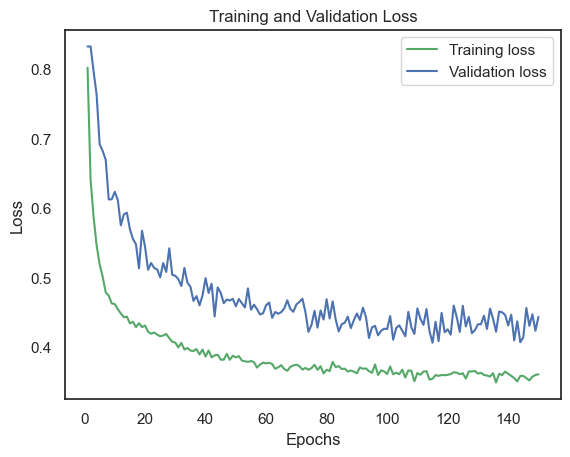

In [ ]:
# Evaluate the training and validation loss
loss_train = rnn_history.history['loss']
loss_val = rnn_history.history['val_loss']
epochs = range(1, 151)

plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

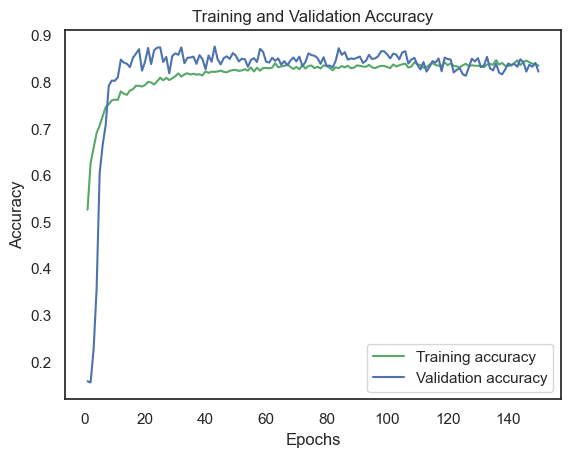

In [ ]:
# Evaluate the training and validation accuracy
acc_train = rnn_history.history['accuracy']
acc_val = rnn_history.history['val_accuracy']

plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print("Shape of x_train_res:", x_train_res.shape)
print("Shape of x_test:", x_test.shape)

Shape of x_train_res: (7786, 19, 1)
Shape of x_test: (1022, 19, 1)


In [ ]:
# Predict on test set
y_pred = rnn.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f} %'.format(accuracy * 100))

Accuracy: 39.04 %


Confusion Matrix:
 [[371 597]
 [ 26  28]]


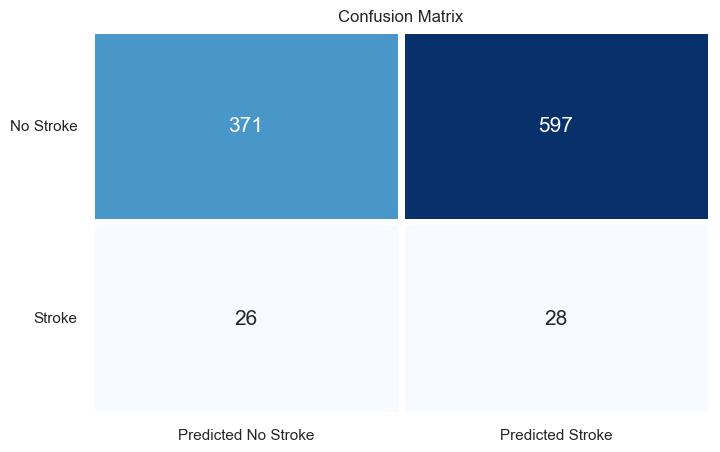

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', linewidths=5, cbar=False, annot_kws={'fontsize': 15},
            yticklabels=['No Stroke', 'Stroke'], xticklabels=['Predicted No Stroke', 'Predicted Stroke'])
plt.yticks(rotation=0)
plt.title('Confusion Matrix')
plt.show()

## LSTM

In [ ]:
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the custom Keras classifier
class KerasClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, batch_size=32, epochs=50, **kwargs):
        self.build_fn = build_fn
        self.batch_size = batch_size
        self.epochs = epochs
        self.kwargs = kwargs

    def fit(self, X, y):
        self.model = self.build_fn(**self.kwargs)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1)
        return self

    def predict(self, X):
        return self.model.predict(X).round()  # rounding for binary classification


In [ ]:
def lstm_classifier():
    lstm = tf.keras.models.Sequential()
    lstm.add(tf.keras.layers.LSTM(units=64, activation='relu', input_shape=(x_train_res.shape[1], x_train_res.shape[2]), return_sequences=True))
    lstm.add(Dropout(0.6))  # Add dropout for regularization
    lstm.add(tf.keras.layers.LSTM(units=32, activation='relu'))
    lstm.add(Dropout(0.6))  # Another dropout layer
    lstm.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer for binary classification
    lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return lstm

In [ ]:
# Prepare the KerasClassifierCustom wrapper for cross-validation
lstm = KerasClassifierCustom(build_fn=lstm_classifier, batch_size=32, epochs=50)

In [ ]:
n_features = x_train_res.shape[1]
x_train_res = x_train_res.reshape((x_train_res.shape[0], 1, n_features))
y_train_res = np.array(y_train_res)

In [ ]:
# Perform 5-fold cross-validation
accuracies = cross_val_score(estimator=lstm, X=x_train_res, y=y_train_res, cv=5)

Epoch 1/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.6081 - loss: 0.6679
Epoch 2/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7535 - loss: 0.5010
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8014 - loss: 0.4442
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8040 - loss: 0.4300
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8188 - loss: 0.4134
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8220 - loss: 0.4067
Epoch 7/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8229 - loss: 0.3933
Epoch 8/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8288 - loss: 0.3877
Epoch 9/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8336 - loss: 0.3818
Epoch 10/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8334 - loss: 0.3791
Epoch 11/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8307 - loss: 0.3780
Epoch 12/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [ ]:
# Checking the mean and standard deviation of the accuracies obtained
mean = accuracies.mean()
std_deviation = accuracies.std()
print("Accuracy: {:.2f} %".format(mean * 100))
print("Standard Deviation: {:.2f} %".format(std_deviation * 100))

Accuracy: 90.88 %
Standard Deviation: 0.35 %


## TUNING HYPERPARAMETER

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
class KerasClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, batch_size=32, epochs=50, optimizer='adam'):
        self.build_fn = build_fn
        self.batch_size = batch_size
        self.epochs = epochs
        self.optimizer = optimizer
        self.model = None

    def fit(self, X, y):
        # Build the model with the current parameters
        self.model = self.build_fn(optimizer=self.optimizer)
        self.model.fit(
            X, y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            validation_split=0.2,  # Add validation split
            verbose=0
        )
        return self

    def predict(self, X):
        # Return predictions as binary class labels
        return (self.model.predict(X) > 0.5).astype(int)

    def score(self, X, y):
        # Return the accuracy score
        return self.model.evaluate(X, y, verbose=0)[1]

    def get_params(self, deep=True):
        # Expose parameters for GridSearchCV
        return {
            "build_fn": self.build_fn,
            "batch_size": self.batch_size,
            "epochs": self.epochs,
            "optimizer": self.optimizer,
        }

    def set_params(self, **params):
        # Update parameters for GridSearchCV
        for param, value in params.items():
            setattr(self, param, value)
        return self


In [ ]:
# Define the LSTM model
def build_lstm(optimizer='adam'):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units=32, activation='relu', input_shape=(x_train_res.shape[1], x_train_res.shape[2]), return_sequences=True))
    model.add(Dropout(rate=0.5))
    model.add(tf.keras.layers.LSTM(units=16, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Initialize the custom Keras classifier
lstm_custom = KerasClassifierCustom(build_fn=build_lstm)

In [ ]:
# Define the hyperparameters to tune
parameters = {
    'batch_size': [16, 32],
    'epochs': [30, 50],
    'build_fn__optimizer': ['adam', 'rmsprop'],
    'build_fn__dropout_rate': [0.3, 0.6],
    'build_fn__units': [32, 64]
}

In [ ]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=lstm_custom, param_grid=parameters, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(x_train_res, y_train_res)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=KerasClassifierCustom(build_fn=<function build_lstm at 0x799a1ff01cf0>),
             param_grid={'batch_size': [16, 32],
                         'build_fn__dropout_rate': [0.3, 0.6],
                         'build_fn__optimizer': ['adam', 'rmsprop'],
                         'build_fn__units': [32, 64], 'epochs': [30, 50]},
             scoring='accuracy', verbose=1)

In [ ]:
# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'batch_size': 16, 'build_fn__dropout_rate': 0.3, 'build_fn__optimizer': 'adam', 'build_fn__units': 32, 'epochs': 30}


### EVALUASI MODEL SETELAH TUNING

In [ ]:
lstm = tf.keras.models.Sequential()
lstm.add(tf.keras.layers.LSTM(units=32, activation='relu', input_shape=(x_train_res.shape[1], x_train_res.shape[2]), return_sequences=True))
lstm.add(tf.keras.layers.Dropout(0.6))
lstm.add(tf.keras.layers.LSTM(units=16, activation='relu'))
lstm.add(tf.keras.layers.Dropout(0.6))
lstm.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
lstm_history = lstm.fit(x_train_res, y_train_res, batch_size=25, epochs=150, validation_split=0.2)

Epoch 1/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6149 - loss: 0.6680 - val_accuracy: 0.3203 - val_loss: 0.7694
Epoch 2/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7068 - loss: 0.5257 - val_accuracy: 0.7266 - val_loss: 0.6535
Epoch 3/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7509 - loss: 0.4831 - val_accuracy: 0.7715 - val_loss: 0.6076
Epoch 4/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7700 - loss: 0.4657 - val_accuracy: 0.7824 - val_loss: 0.6007
Epoch 5/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7776 - loss: 0.4401 - val_accuracy: 0.7901 - val_loss: 0.5894
Epoch 6/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7845 - loss: 0.4320 - val_accuracy: 0.8254 - val_loss: 0.5586
Epoch 7/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7740 - loss: 0.4393 - val_accuracy: 0.8350 - val_loss: 0.5275
Epoch 8/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7804 - loss: 0.4311 - val_ac

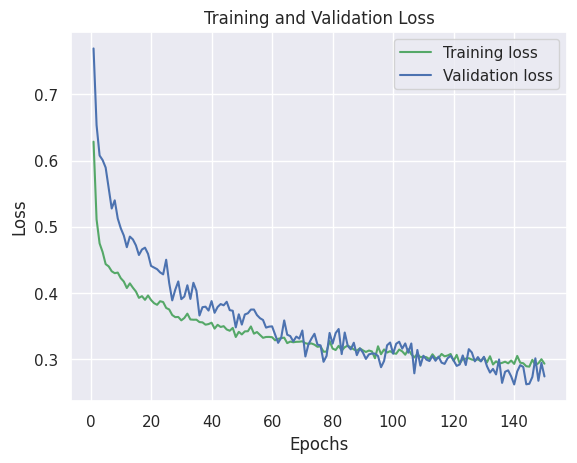

In [ ]:
# Evaluate the training and validation loss
loss_train = lstm_history.history['loss']
loss_val = lstm_history.history['val_loss']
epochs = range(1, 151)

plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

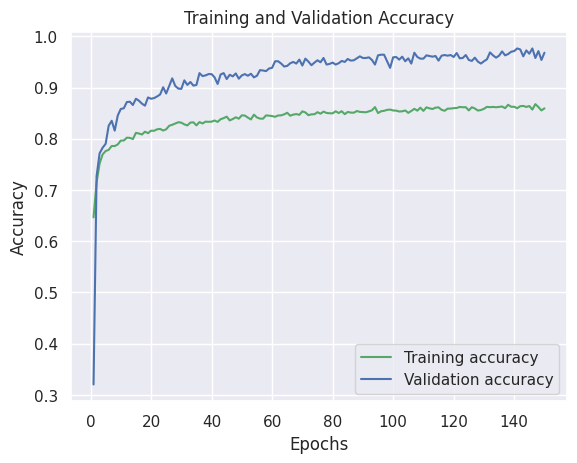

In [ ]:
# Evaluate the training and validation accuracy
acc_train = lstm_history.history['accuracy']
acc_val = lstm_history.history['val_accuracy']

plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print("Shape of x_train_res:", x_train_res.shape)
print("Shape of x_test:", x_test.shape)

Shape of x_train_res: (7786, 1, 19)
Shape of x_test: (1022, 19)


In [ ]:
# Reshape x_test
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

# Make predictions
y_pred = lstm.predict(x_test)

# Convert probabilities to binary predictions
y_pred = (y_pred > 0.5).astype(int)

# Evaluate predictions
print(y_pred)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f} %'.format(accuracy * 100))

Accuracy: 80.63 %


Confusion Matrix:
 [[817 151]
 [ 47   7]]


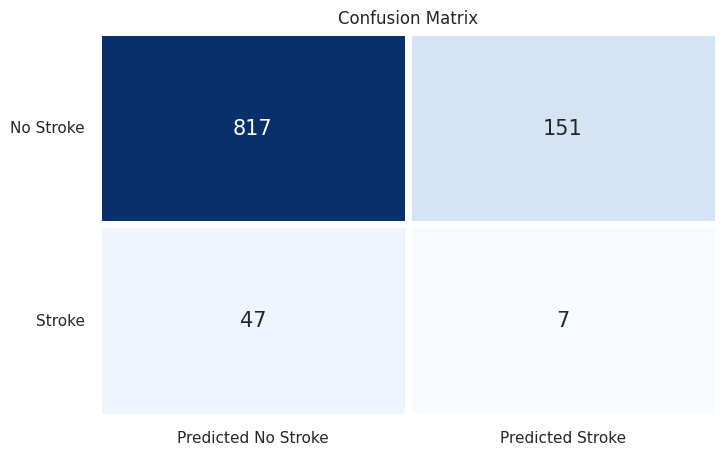

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', linewidths=5, cbar=False, annot_kws={'fontsize': 15},
            yticklabels=['No Stroke', 'Stroke'], xticklabels=['Predicted No Stroke', 'Predicted Stroke'])
plt.yticks(rotation=0)
plt.title('Confusion Matrix')
plt.show()

# CONCLUSION

Therefore, after the multiple visualizations of our and going through all the performance of the models. I tune the hyperparameters with the help of GridSearch to get models. After that, I came to conclusion that RandomForestClassifier is best model for this dataset.